In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\CFBPredic\tables\CFB_limpio.csv")

In [205]:

print("Dimensiones del dataset final")
print(df.shape)

print("Información de las columnas")
print(df.info())

Dimensiones del dataset final
(417, 9)
Información de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   government     417 non-null    object 
 1   month          417 non-null    object 
 2   year           417 non-null    int64  
 3   cfb_cost       417 non-null    float64
 4   family_income  417 non-null    float64
 5   consumptionCI  417 non-null    float64
 6   RexPercent     417 non-null    float64
 7   month_num      417 non-null    int64  
 8   date           417 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 29.4+ KB
None


In [206]:
# Revisamos valores nulos o duplicados
print("Valores nulos")
print(df.isnull().sum())

print("Filas duplicadas")
print(df.duplicated().sum())

Valores nulos
government       0
month            0
year             0
cfb_cost         0
family_income    0
consumptionCI    0
RexPercent       0
month_num        0
date             0
dtype: int64
Filas duplicadas
0


In [207]:
# Revisamos estadísticas descriptivas
print("Estadísticas Descriptivas")
print(df.describe())

Estadísticas Descriptivas
              year    cfb_cost  family_income  consumptionCI  RexPercent  \
count   417.000000  417.000000     417.000000     417.000000  417.000000   
mean   2007.755396  507.561223     439.721247      67.848537   20.378225   
std      10.272612  181.749442     249.714871      76.131046   20.946789   
min    1982.000000  178.750000      73.520000     -80.260000  -10.070000   
25%    1999.000000  369.540000     222.930000      -0.040000   -0.010000   
50%    2008.000000  503.050000     373.340000      91.360000   23.600000   
75%    2017.000000  701.930000     700.000000     135.600000   35.000000   
max    2025.000000  819.770000     877.330000     185.880000   67.200000   

        month_num  
count  417.000000  
mean     6.501199  
std      3.449585  
min      1.000000  
25%      4.000000  
50%      7.000000  
75%      9.000000  
max     12.000000  


## Tendencia y estructura de la serie temporal
1) **Serie Temporal del costo de la CFB**

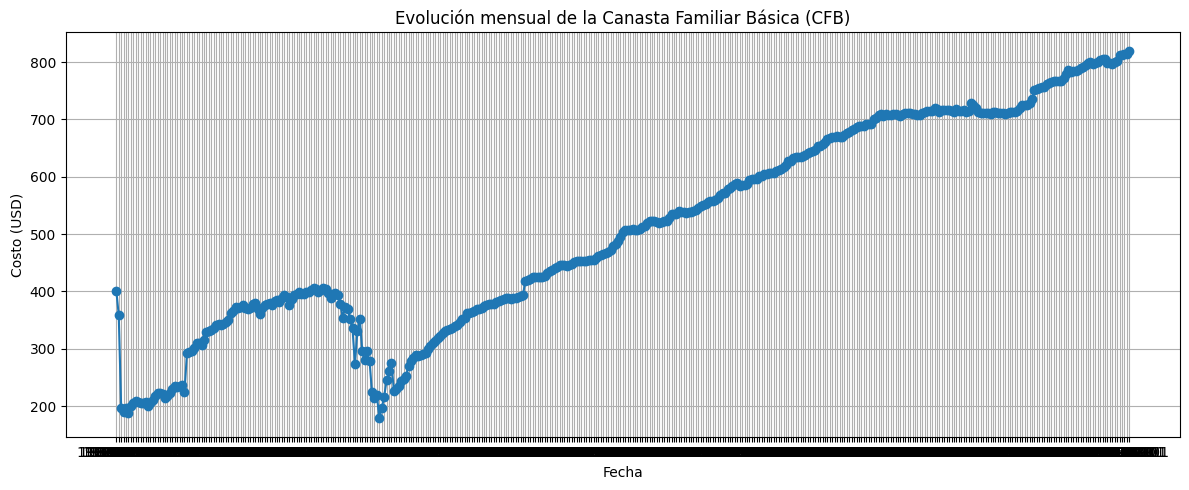

In [208]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["cfb_cost"], marker="o")
plt.title("Evolución mensual de la Canasta Familiar Básica (CFB)")
plt.xlabel("Fecha")
plt.ylabel("Costo (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


2) **Serie Temporal del Ingreso Familiar**

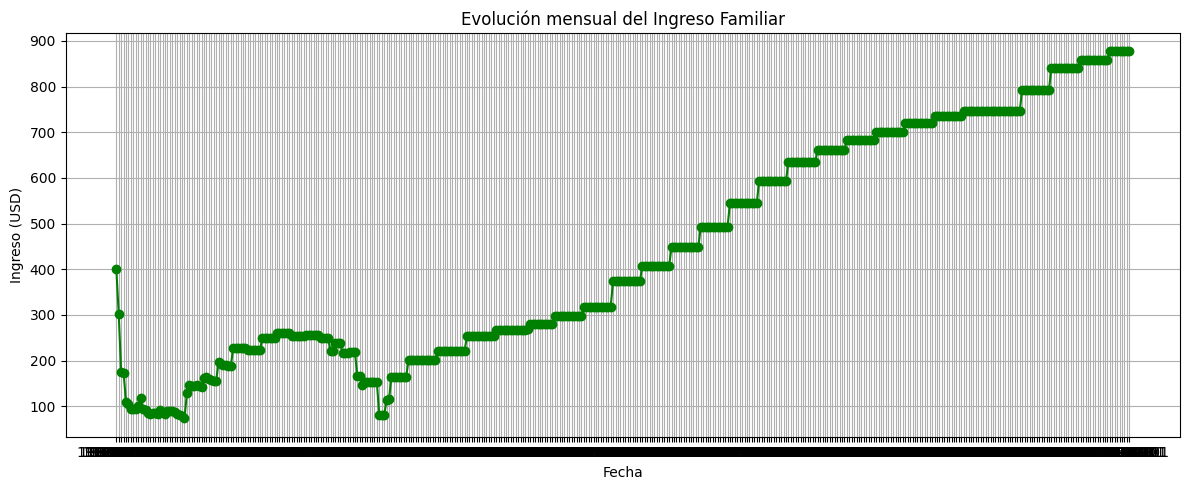

In [209]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["family_income"], marker="o", color='green')
plt.title("Evolución mensual del Ingreso Familiar")
plt.xlabel("Fecha")
plt.ylabel("Ingreso (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



3) **Serie temporal de Restricción/Excendente**

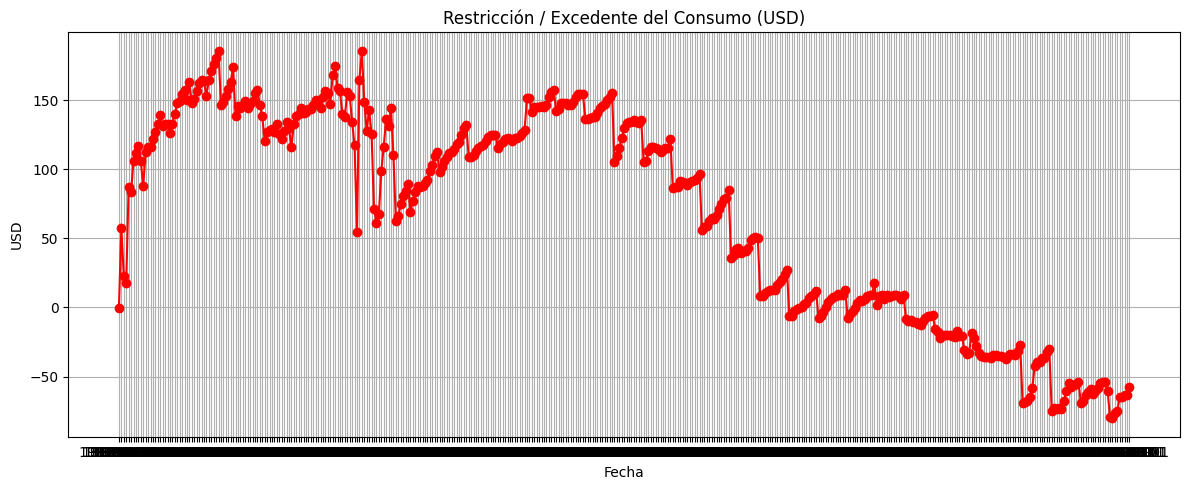

In [210]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["consumptionCI"], marker="o", color='red')
plt.title("Restricción / Excedente del Consumo (USD)")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()


## Análisis estacional y patrones intra-anuales
1) **Boxplot del costo por mes** (revisamos si algunos meses son más altos)

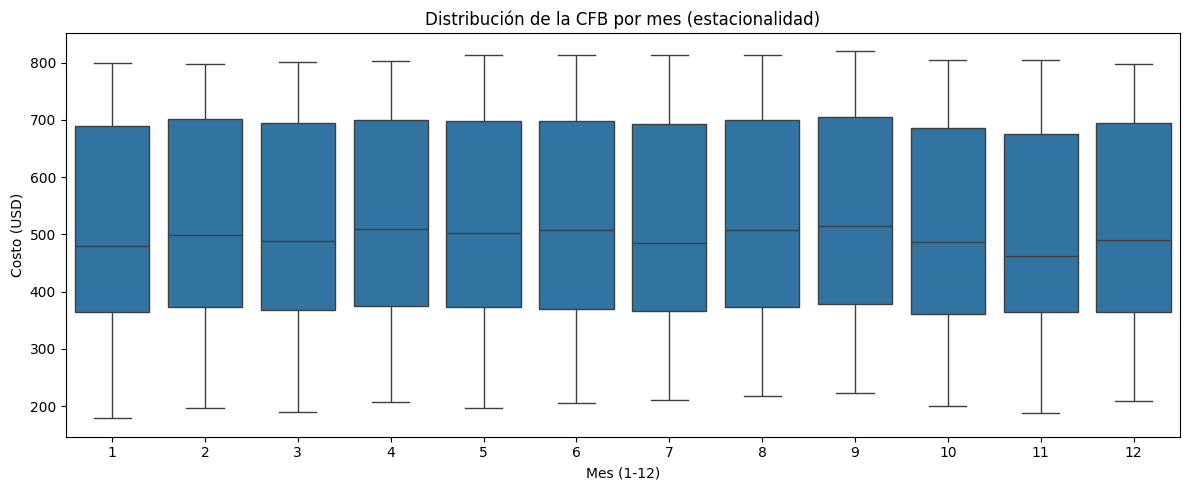

In [211]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="month_num", y="cfb_cost")
plt.title("Distribución de la CFB por mes (estacionalidad)")
plt.xlabel("Mes (1-12)")
plt.ylabel("Costo (USD)")
plt.tight_layout()
plt.show()


2) **Promedio mensual histórico**

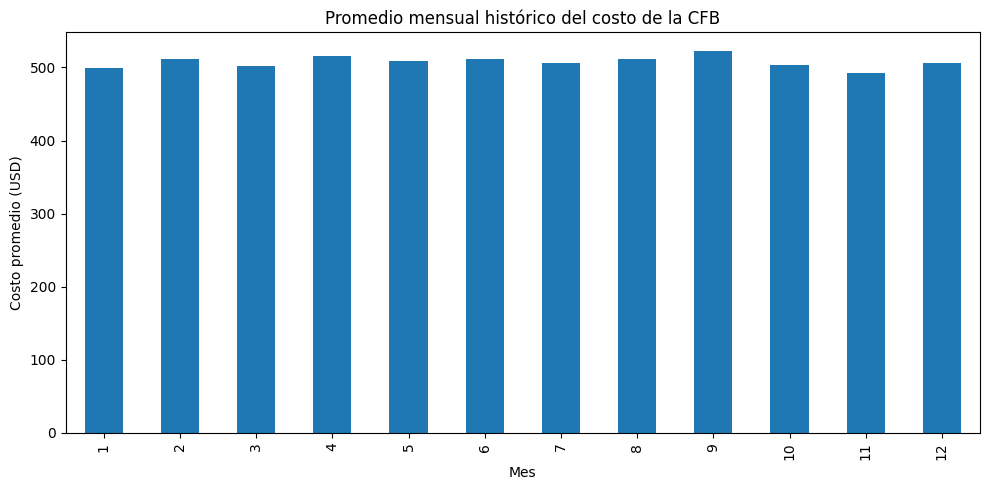

In [212]:
df.groupby("month_num")["cfb_cost"].mean().plot(kind="bar", figsize=(10,5))
plt.title("Promedio mensual histórico del costo de la CFB")
plt.xlabel("Mes")
plt.ylabel("Costo promedio (USD)")
plt.tight_layout()
plt.show()


## Distribución y outliers
1) **Histograma del costo**

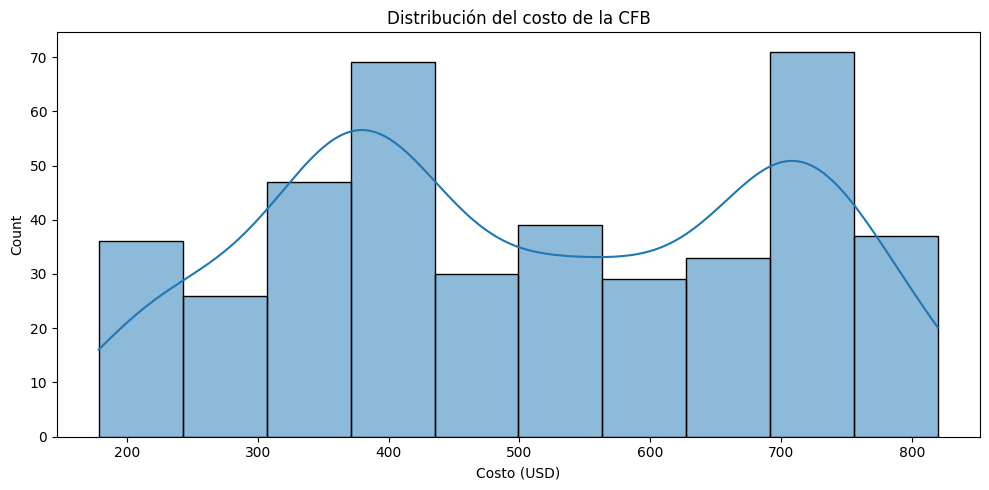

In [213]:
plt.figure(figsize=(10,5))
sns.histplot(df["cfb_cost"], kde=True)
plt.title("Distribución del costo de la CFB")
plt.xlabel("Costo (USD)")
plt.tight_layout()
plt.show()


2) **Boxplot general del costo**

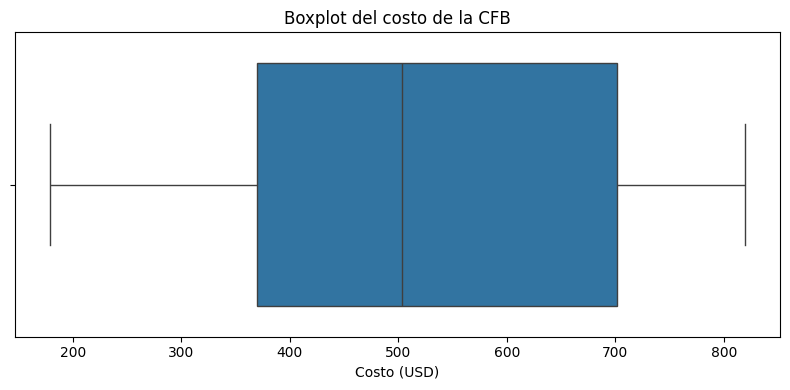

In [214]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["cfb_cost"])
plt.title("Boxplot del costo de la CFB")
plt.xlabel("Costo (USD)")
plt.tight_layout()
plt.show()

## Relaciones entre varibales
1) **Correlación entre variables numéricas**

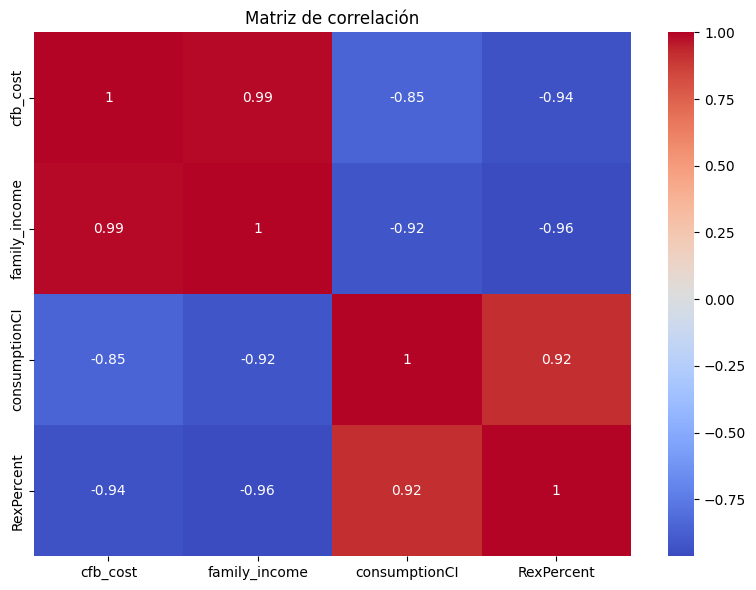

In [215]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["cfb_cost","family_income","consumptionCI","RexPercent"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


2) **CFB vs Ingreso Familiar**

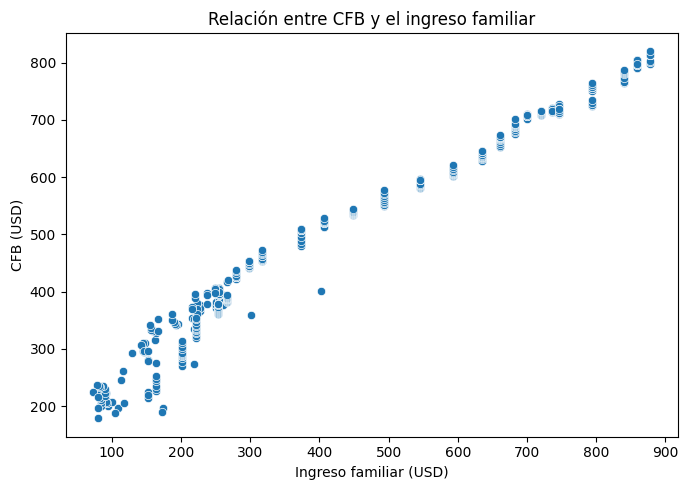

In [216]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="family_income", y="cfb_cost")
plt.title("Relación entre CFB y el ingreso familiar")
plt.xlabel("Ingreso familiar (USD)")
plt.ylabel("CFB (USD)")
plt.tight_layout()
plt.show()


3) **CFB vs Restircción/Excedente**

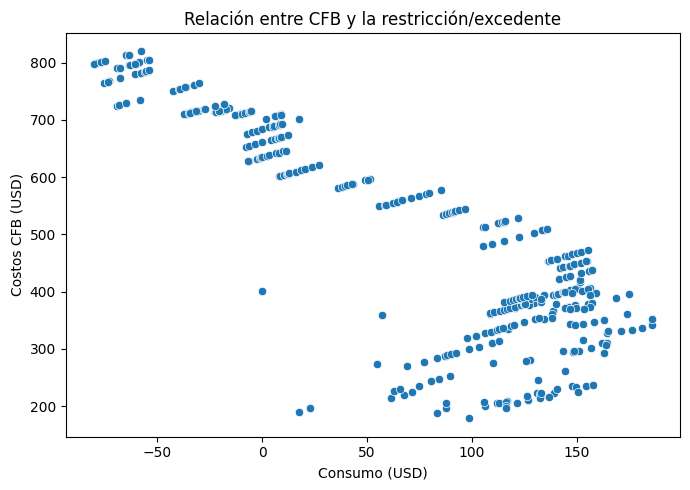

In [217]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="consumptionCI", y="cfb_cost")
plt.title("Relación entre CFB y la restricción/excedente")
plt.xlabel("Consumo (USD)")
plt.ylabel("Costos CFB (USD)")
plt.tight_layout()
plt.show()


## Descomposición de series temporales
1) **Dividimos la serie en:**
* Tendencia
* Estacionalidad
* Residuo

(Esto te dice si hay estacionalidad fuerte, algo clave para el modelo.)

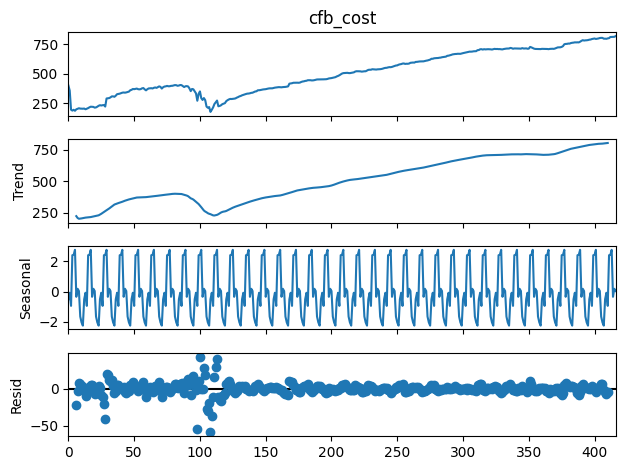

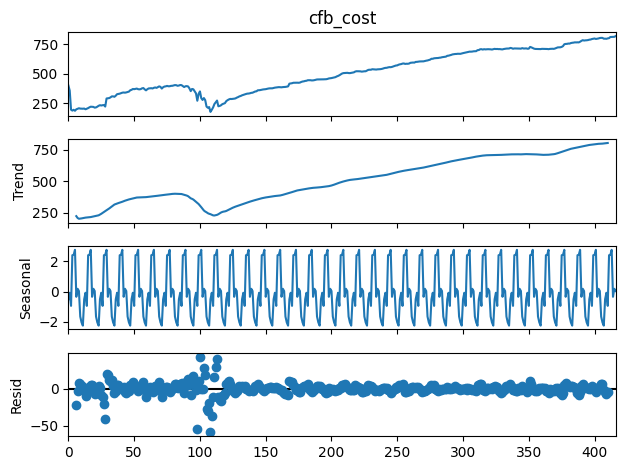

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["cfb_cost"], model="additive", period=12)
result.plot()



## Autocorrelación y parciales (ACF y PACF)
Necesarias si usarás ARIMA o SARIMA.

<Figure size 1200x400 with 0 Axes>

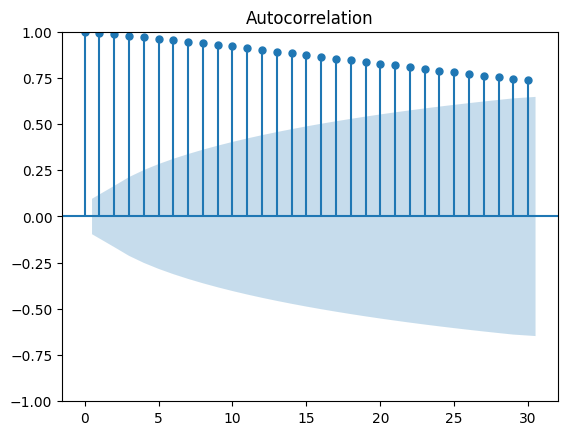

<Figure size 1200x400 with 0 Axes>

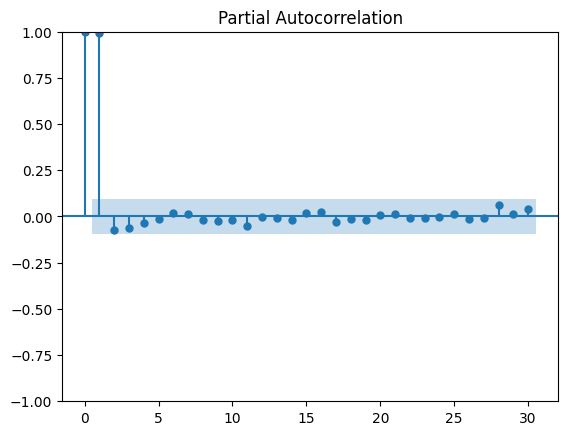

In [219]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(df["cfb_cost"], lags=30)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df["cfb_cost"], lags=30)
plt.show()
